### PimaIndiansdiabetes :
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [20]:
import pandas as pd
df1 = pd.read_csv('Datasets/PimaIndiansdiabetes.csv')

In [21]:
def countZeros(df):
    zeros={}
    for col in df.columns:
        if col not in ['Pregnancies' ,'Outcome']:
            l = len(list(filter(lambda x : x==0,df[col])))
            zeros[col] = l
    return zeros
countZeros(df1)

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

###  Hospital Frankfurt Germany diabetes dataset
https://www.kaggle.com/datasets/johndasilva/diabetes

In [22]:
df2 = pd.read_csv('Datasets/FrankfurtGermanyDiabetes.csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [23]:
countZeros(df2)

{'Glucose': 13,
 'BloodPressure': 90,
 'SkinThickness': 573,
 'Insulin': 956,
 'BMI': 28,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

## Concatenating `df1` anf `df2`

In [24]:
final_df = pd.concat([df1,df2],ignore_index = True)

In [25]:
final_df.shape

(2768, 9)

In [26]:
countZeros(final_df)

{'Glucose': 18,
 'BloodPressure': 125,
 'SkinThickness': 800,
 'Insulin': 1330,
 'BMI': 39,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

In [27]:
final_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


__We can see that some features have zero value and that is not relevent so I am replacing zero with average.__

In [28]:
def replaceZeros(df,col):
    for i in range(df.shape[0]):
        if df[col][i] == 0:
            val = df[col].mean()
            df[col].replace(0 ,int(val),inplace = True)           
    return f"replaced zeros of feature {col} successfully."

In [29]:
replaceZeros(final_df,"BMI")
replaceZeros(final_df,"Glucose")
replaceZeros(final_df,"SkinThickness")
replaceZeros(final_df,"Insulin")
replaceZeros(final_df,"BloodPressure")

'replaced zeros of feature BloodPressure successfully.'

In [30]:
final_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,20,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
final_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.889451,72.250361,26.604769,118.567197,32.588259,0.471193,33.132225,0.343931
std,3.323801,30.501045,12.009084,9.965093,89.707962,7.103772,0.325669,11.777230,0.475104
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.000000,80.000000,27.575000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sn

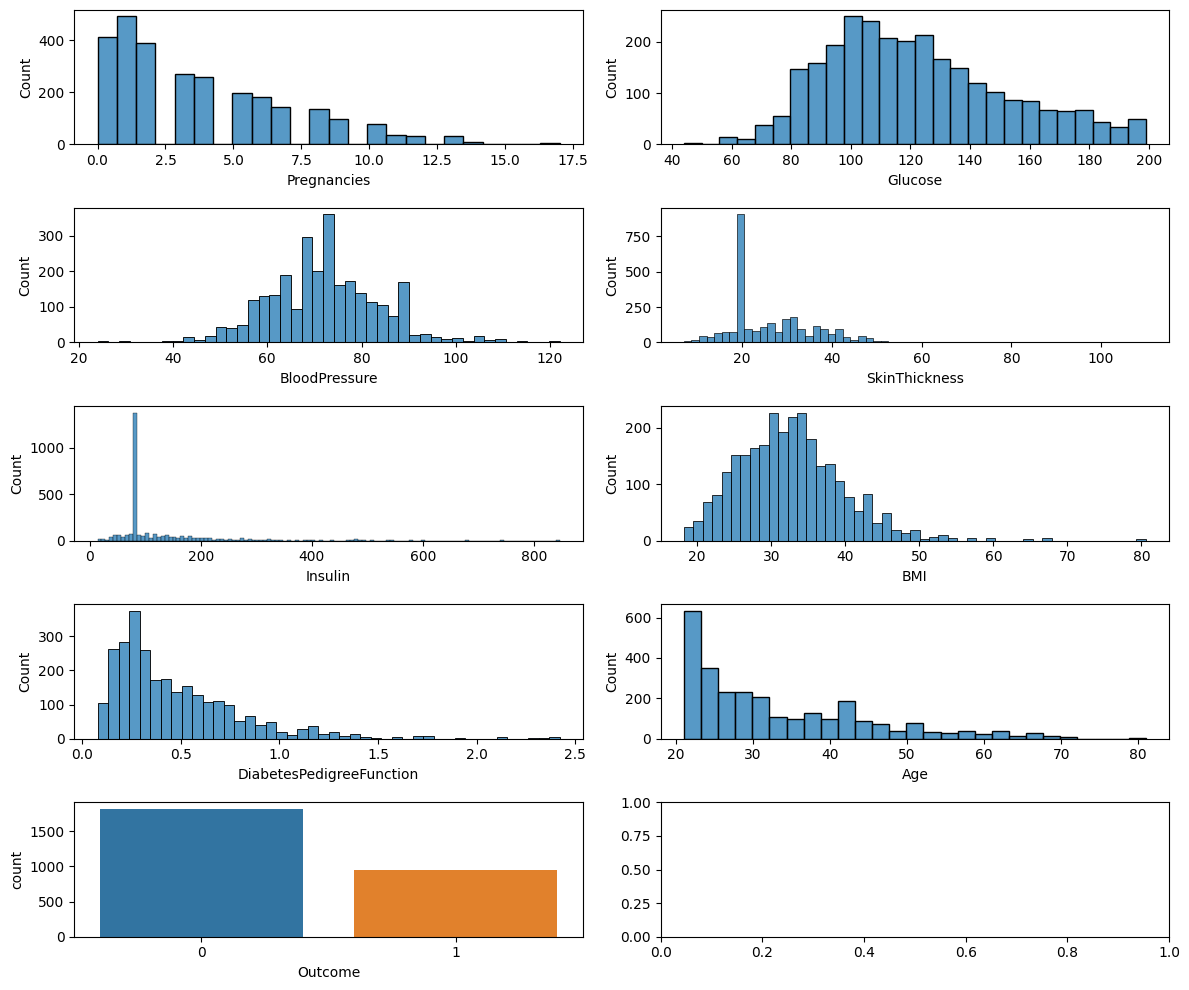

In [33]:
def distribution_Plot(df):
    fig, axes = plt.subplots(5, 2, figsize=(12, 10))

    sn.histplot(data=df, x="Pregnancies",ax=axes[0,0])

    sn.histplot(data=df, x="Glucose",ax=axes[0,1])

    sn.histplot(data=df, x="BloodPressure",ax=axes[1,0])

    sn.histplot(data=df, x="SkinThickness",ax=axes[1,1])

    sn.histplot(data=df, x="Insulin",ax=axes[2,0])

    sn.histplot(data=df, x="BMI",ax=axes[2,1])

    sn.histplot(data=df, x="DiabetesPedigreeFunction",ax=axes[3,0])

    sn.histplot(data=df, x="Age",ax=axes[3,1])

    sn.countplot(data=df, x="Outcome",ax=axes[4,0])

    plt.tight_layout();
# Calling
distribution_Plot(final_df)

Text(0.5, 1.0, 'Correlation plot ')

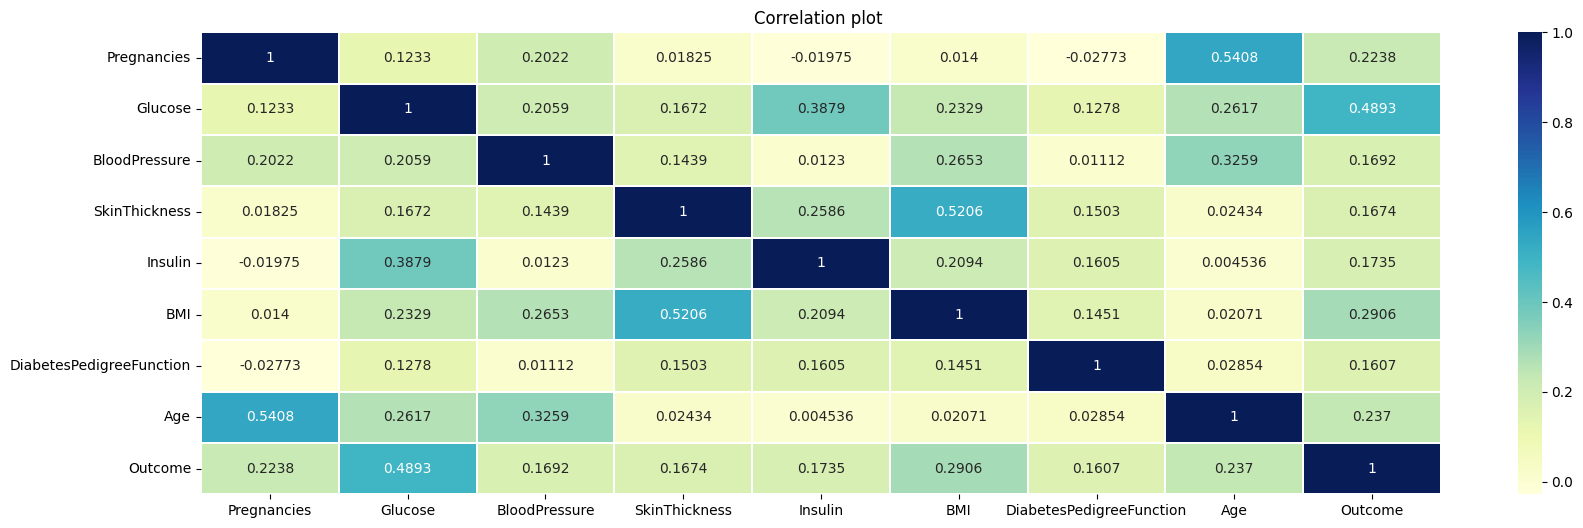

In [34]:
# Visulization of correlations
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(20,6))
sn.heatmap(final_df.corr(),annot=True,fmt='0.4g',cmap="YlGnBu",linewidths=.3)
plt.title("Correlation plot ")

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [36]:
final_df.to_csv("Datasets/FinalDiabetesDataset(Avg).csv",index=False)